# Slicing Iregular Grids 

**Acknowledgement:** The material was provided by Mrs. Kuan-Yun Wang, UC Davis.

## 非直線的剖面 (cross-section) 繪製

本節學習如何使用xarray繪製「不是沿著相同經緯線」的cross section，這裡提供的範例是繪製渤海、黃海、東海到南海這個曲折線段上的 $V$ 風垂直剖面。

首先引入需要的packages，以及讀取2016年1月份的V-wind資料，並取1月份平均。

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps

v     = xr.open_dataset('data/vwnd.2016.nc').vwnd
v_jan = v.sel(time=(v.time.dt.month.isin([1]))).mean('time')

接下來讀取渤海、黃海、東海到南海這個曲折線段的經緯度，並選擇要繪製的經緯度範圍 (以[文字檔](https://wyhtsai.github.io/pyaos-wks/docs/sellatlon_EA.txt)儲存，其中第一欄為經度，第二欄為緯度)。

In [2]:
y_pos, x_pos= np.loadtxt('sellatlon_EA.txt', dtype=float, unpack=True)
x_pos = x_pos[y_pos <= 50]
y_pos = y_pos[y_pos <= 50]
x_pos = x_pos[y_pos >= 0]
y_pos = y_pos[y_pos >= 0]

為`x_pos`、`y_pos`建立新的DataArray，並設定擁有相同的dimension。接著，使用`xr.interp`函數對 $V$ 風場資料內插到所選的經緯度(x_pos, y_pos)上。

In [3]:
da_lons = xr.DataArray(x_pos, dims='lat')
da_lats = xr.DataArray(y_pos, dims='lat')
v_cro   = v_jan.interp(lat=da_lats, lon=da_lons)
v_cro

<xarray.DataArray 'vwnd' (level: 17, lat: 500)>
array([[-3.68268522, -3.66213074, -3.64047876, ..., -3.11352991,
        -3.05033255, -2.98713519],
       [-3.64299498, -3.61555066, -3.58706748, ..., -3.33184726,
        -3.2842215 , -3.23659573],
       [-7.25529253, -7.23878454, -7.22188098, ..., -1.58555811,
        -1.56942647, -1.55329484],
       ...,
       [ 4.52398556,  4.62559524,  4.72667311, ...,  0.30175616,
         0.31368649,  0.32561683],
       [11.18332733, 11.25741096, 11.33039131, ..., -0.15216129,
        -0.15066706, -0.14917283],
       [20.89200851, 20.86511519, 20.83686176, ...,  1.41306749,
         1.41367915,  1.41429081]])
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float64 50.0 49.9 49.8 49.7 49.6 49.5 ... 0.5 0.4 0.3 0.2 0.1
    lon      (lat) float64 114.4 114.5 114.6 114.6 ... 108.0 108.0 108.0 108.0

`v_cro`的維度是 $N_{\text{lat}} \times N_{\text{level}}$ ；另外精度位置是`lat`緯度的函數。

最後就是用`xarray.plot.contourf`作圖，結果如下：

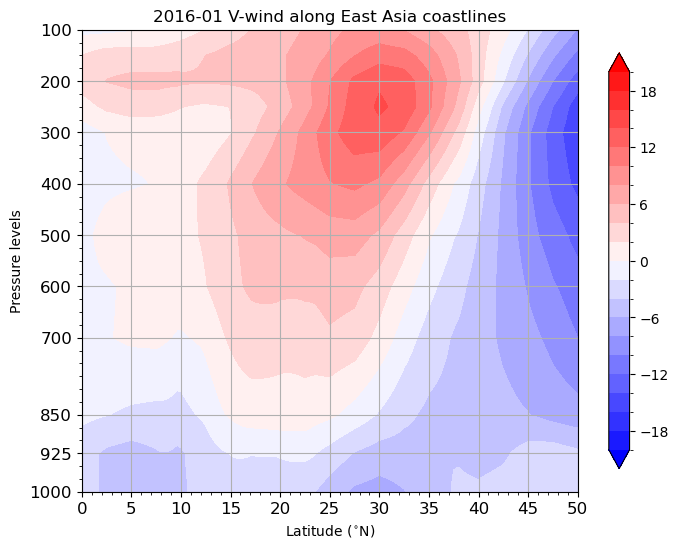

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))

v_plot   =  v_cro.plot.contourf(
            x='lat', y='level', ylim=(1000, 100),
            ax=ax,
            levels = np.arange(-20, 22, 2),
            cmap = cmaps.MPL_bwr, alpha = 1,
            add_colorbar=True,
            extend='both',
            cbar_kwargs={'orientation': 'vertical', 'aspect': 20, 'shrink': 0.9, 'extend':'both', 'label': ''})

ax.set_xlim([0, 50])
ax.set_xticks(np.arange(0, 50+1,5))
ax.set_xticks(np.arange(0, 50+1,1), minor = True)
ax.set_yticks([1000, 925, 850, 700, 600, 500, 400, 300, 200, 100])
ax.set_yticks(np.arange(1000, 100, -25), minor = True)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Latitude ($^{\circ }$N)')
ax.set_ylabel('Pressure levels')
ax.set_title('')
ax.grid()
ax.set_title('2016-01 V-wind along East Asia coastlines')

plt.show()